In [33]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [34]:
data = pd.read_csv('../data/no_icu_clean.csv')
data = data.drop(columns=['Unnamed: 0', 'current_status'])
data

,sex,hosp_yn,death_yn,medcond_yn,age_0,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,race_native,race_native_pacific,race_black,race_white,race_asian,race_hispanic,race_other
0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483211,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1483212,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1483213,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1483214,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False


In [35]:
Z = data.iloc[:, :].values
X = Z[:, [i for i in range(Z.shape[1]) if i not in [1, 2]]]

In [44]:
pca_score = {'n_components': [], 'score': [], 'explained_variance_ratio_': []}

for n_components in tqdm(range(X.shape[1])):
    pca_score['n_components'].append(n_components)
    pca = PCA(n_components=n_components).fit(X)
    pca_score['score'].append(pca.score(X))
    pca_score['explained_variance_ratio_'].append(pca.explained_variance_ratio_)

100%|██████████| 18/18 [01:05<00:00,  3.65s/it]


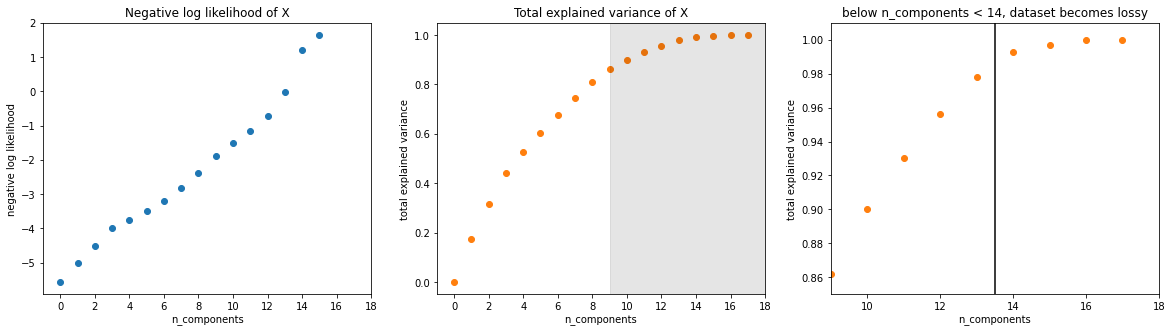

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.scatter(pca_score['n_components'], pca_score['score'])
ax1.set_xlabel('n_components'); ax1.set_ylabel('negative log likelihood')
ax1.set_title('Negative log likelihood of X'); ax1.set_xticks(range(0, 20, 2)); ax1.set_xlim(-1, 18);

ax2.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax2.set_xlabel('n_components'); ax2.set_ylabel('total explained variance'); ax2.axvspan(9, 18, color='black', alpha=0.1)
ax2.set_title('Total explained variance of X'); ax2.set_xticks(range(0, 20, 2)); ax2.set_xlim(-1, 18);

ax3.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax3.set_xlabel('n_components'); ax3.set_ylabel('total explained variance'); ax3.set_xticks(range(0, 20, 2)); ax3.set_xlim(9, None); ax3.set_ylim(0.85, 1.01)
ax3.axvline(13.5, color='black', label='n_components = 13.5'); ax3.set_title('below n_components < 14, dataset becomes lossy');